## Handwritten Digit Recognition (MNIST)



# Import Libraries

In [1]:
# Basic libraries
import numpy as np # For stastical Function
import matplotlib.pyplot as plt ##  For Ploting

# TensorFlow deep learning framework
import tensorflow as tf
from tensorflow.keras import models, layers


## Load MNIST Dataset

In [3]:
# Loads 60,000 training images and 10,000 testing images
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Normalize & Reshape Data

In [4]:
# Pixel values from 0–255 -> convert to 0–1 (helps faster training)
x_train = x_train / 255.0
x_test = x_test / 255.0

# CNN expects 4D input: (batch, height, width, channels)
# MNIST is grayscale -> 1 channel
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


## Show Sample Image

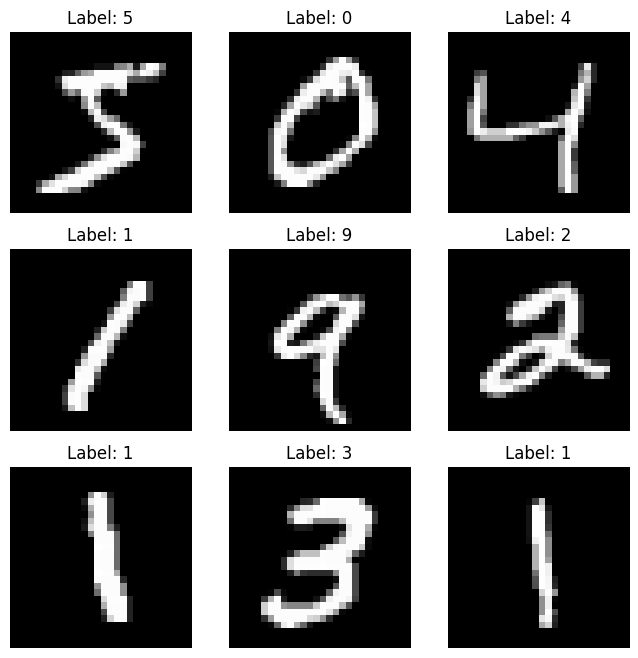

In [5]:
# Display 9 sample digits from training set
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i].reshape(28,28), cmap="gray")
    plt.title("Label: " + str(y_train[i]))
    plt.axis("off")
plt.show()


In [16]:
## Built CNN Model

In [6]:
# Build a CNN using Sequential API
model = models.Sequential([

    # 1st Convolution Layer (detects edges & patterns)
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),  # reduces image size

    # 2nd Convolution Layer (detects deeper features)
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    # Convert 2D feature maps -> 1D vector
    layers.Flatten(),

    # Hidden dense layer (learns pattern relationships)
    layers.Dense(128, activation='relu'),

    # Output layer: 10 neurons = 10 digit classes
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile Model

In [7]:
# Adam = popular optimizer
# sparse_categorical_crossentropy = best for 10-class integer labels
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


## Show Model Summary

In [8]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Train The Model

In [10]:
# Train for 5 epochs (enough for high accuracy)
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_split=0.2  # 20% used for validation
)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.8935 - loss: 0.3445 - val_accuracy: 0.9817 - val_loss: 0.0625
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.9849 - loss: 0.0472 - val_accuracy: 0.9862 - val_loss: 0.0480
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9912 - loss: 0.0284 - val_accuracy: 0.9863 - val_loss: 0.0453
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9932 - loss: 0.0212 - val_accuracy: 0.9882 - val_loss: 0.0453
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 18ms/step - accuracy: 0.9937 - loss: 0.0175 - val_accuracy: 0.9893 - val_loss: 0.0389


## Plot Accurasy Graph

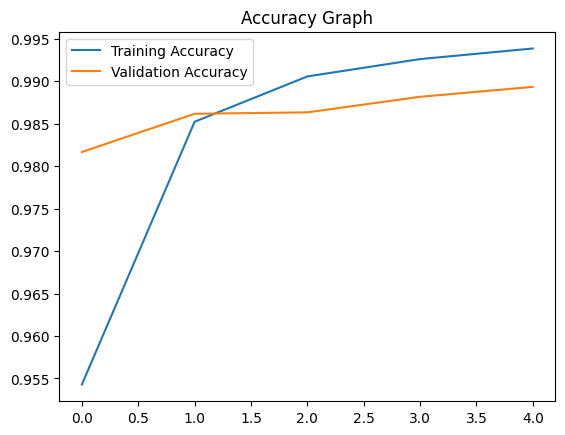

In [11]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Graph")
plt.legend()
plt.show()


## Plot Loss Graph

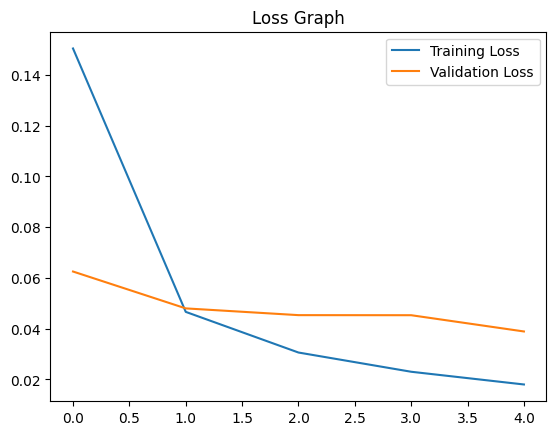

In [17]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Graph")
plt.legend()
plt.show()


##Evaluate model on test set

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9871 - loss: 0.0386
Test Accuracy: 0.9901999831199646


## Predict on a sample digit // Test1

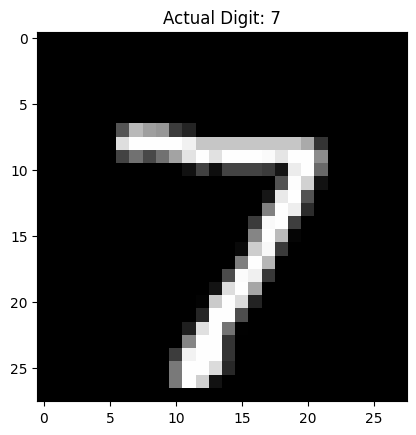

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicted Digit: 7


In [13]:
# Choose any image from test set
index = 0

plt.imshow(x_test[index].reshape(28,28), cmap="gray")
plt.title("Actual Digit: " + str(y_test[index]))
plt.show()

# Model prediction
prediction = model.predict(x_test[index].reshape(1,28,28,1))
print("Predicted Digit:", np.argmax(prediction))


## TESTING

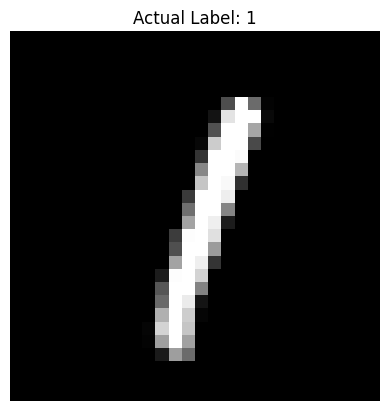

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted Digit: 1


In [14]:
# Pick any test image (0–9999)
index = 5

# Show the image
plt.imshow(x_test[index].reshape(28,28), cmap="gray")
plt.title("Actual Label: " + str(y_test[index]))
plt.axis("off")
plt.show()

# Predict using the model
prediction = model.predict(x_test[index].reshape(1,28,28,1))

print("Predicted Digit:", np.argmax(prediction))


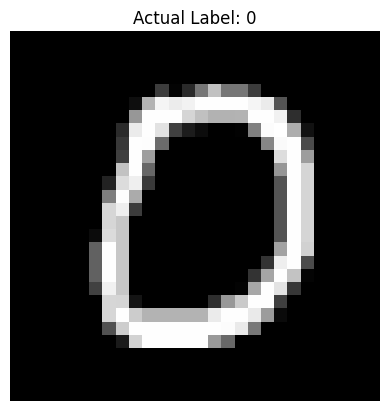

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicted Digit: 0


In [15]:
# Pick any test image (0–9999)
index = 10

# Show the image
plt.imshow(x_test[index].reshape(28,28), cmap="gray")
plt.title("Actual Label: " + str(y_test[index]))
plt.axis("off")
plt.show()

# Predict using the model
prediction = model.predict(x_test[index].reshape(1,28,28,1))

print("Predicted Digit:", np.argmax(prediction))
